<a href="https://colab.research.google.com/github/akanugan/Data_Science_Notebooks/blob/main/Predict_Health_Insurance_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estimating Healthcare Insurance Expenses through Machine Learning.

Given a dataset of healthcare data, predict the expenses


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cd /content/drive/MyDrive/HealthCare

Mounted at /content/drive


#Analyzing Insurance Costs.

Uploaded a public extracted data from the "insurance.csv" file that contains age, gender, BMI, family size, smoking habits, and geographical location. By exploring these data patterns and relationships. Ultimately, our mission is to pave the way for more efficient healthcare planning, fairer insurance premiums, and a future where healthcare is within reach for everyone.


In [ ]:
#--- Import Pandas ---
import numpy as np
import pandas as pd

#--- Read in dataset ----
df = pd.read_csv("/content/drive/MyDrive/HealthCare/insurance.csv")

df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


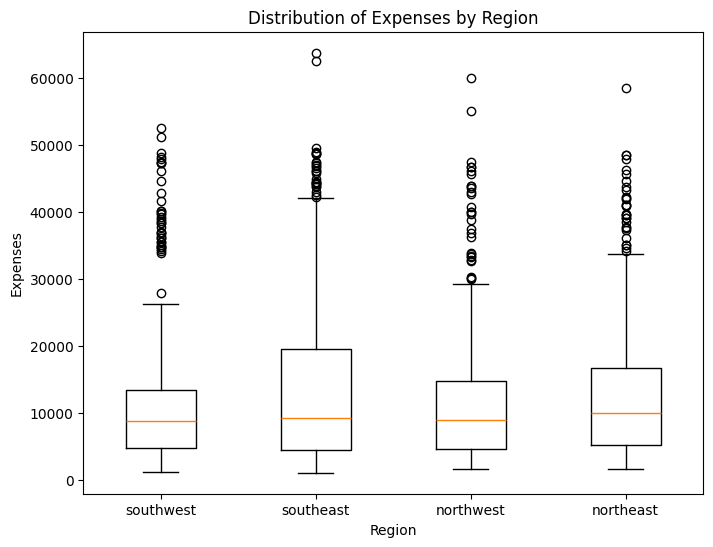

In [ ]:
# @title Distribution of Expenses by Region

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(8, 6))
plt.boxplot([df[df['region'] == r]['expenses'] for r in df['region'].unique()], labels=df['region'].unique())
plt.title('Distribution of Expenses by Region')
plt.xlabel('Region')
_ = plt.ylabel('Expenses')

# Kill duplicates.

Removing these duplicates is paramount, as it ensures the integrity of our analysis, prevents skewed results, and allows us to maintain a high standard of data quality.


In [ ]:

duplicates = df.duplicated().sum()
duplicates

1

In [ ]:

df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
null_values = df.isnull().sum()
null_values

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


## Label encoder for sex, smoker categories

Using sklearn's LabelEncoder module

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_encode = LabelEncoder()
columns =['sex','smoker']
for col in columns :
    df[col]=lab_encode.fit_transform(df[col])
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55
1334,18,0,31.9,0,0,northeast,2205.98
1335,18,0,36.9,0,0,southeast,1629.83
1336,21,0,25.8,0,0,southwest,2007.95


## One-Hot Encoding.

 This task is essential to translate geographical regions into numerical representations, allowing us to incorporate this valuable information into our analysis.

In [ ]:
one_hot_encode = pd.get_dummies(df['region'])
one_hot_encode

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


## add new cols to the existing df and drop the 'region' col

In [ ]:
df1 = pd.concat([df, one_hot_encode], axis=1)
df1

,age,sex,bmi,children,smoker,region,expenses,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,False,False,False,True
1,18,1,33.8,1,0,southeast,1725.55,False,False,True,False
2,28,1,33.0,3,0,southeast,4449.46,False,False,True,False
3,33,1,22.7,0,0,northwest,21984.47,False,True,False,False
4,32,1,28.9,0,0,northwest,3866.86,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55,False,True,False,False
1334,18,0,31.9,0,0,northeast,2205.98,True,False,False,False
1335,18,0,36.9,0,0,southeast,1629.83,False,False,True,False
1336,21,0,25.8,0,0,southwest,2007.95,False,False,False,True


In [ ]:
df1.drop('region', axis=1, inplace=True)

## train-test split

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y = df1['expenses']
X = df1.drop('expenses', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state =42)


Evaluating Model Performance.

Using a Random Forest Regression model. This task is essential in understanding how well our model can predict insurance charges, providing a crucial tool for making informed financial and healthcare decisions.

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
rand_forest_model = RandomForestRegressor(n_estimators=50, n_jobs=2, random_state=42)
cv_scores = cross_val_score(rand_forest_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
# --- WRITE YOUR CODE FOR TASK 2 ---
rmse_c= np.sqrt(-cv_scores)
std = rmse_c.std()
std

572.7637249770696

## Forecasting Healthcare Costs.

With a Random Forest Regression model in place, we've trained it on the training dataset, equipping it with the knowledge to predict healthcare charges.

In [ ]:
rand_forest_model.fit(X_train, y_train)
predictions = rand_forest_model.predict(X_test)
rounded_predictions = np.round(predictions, 2)
actual=np.round(y_test.values,2)
compare = pd.DataFrame({'Actual Charges': actual[:10], 'Predicted Charges': rounded_predictions[:10]})

#--- Inspect data ---
compare

,Actual Charges,Predicted Charges
0,8688.86,9953.83
1,5708.87,6193.26
2,11436.74,11478.22
3,38746.36,42666.82
4,4463.21,7141.46
5,9304.70,9447.02
6,38511.63,39935.05
7,2150.47,2220.70
8,7345.73,9115.48
9,10264.44,10845.15


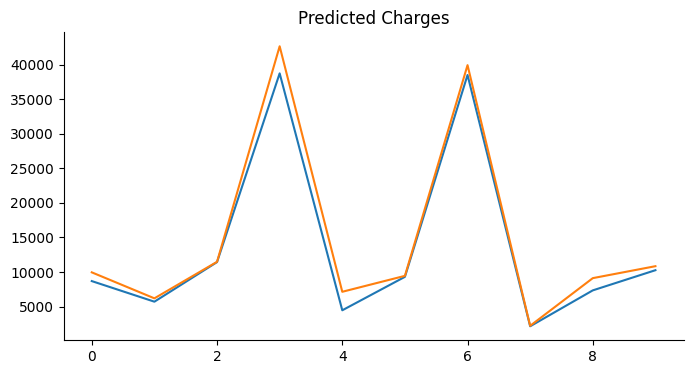

In [ ]:
from matplotlib import pyplot as plt
compare['Actual Charges'].plot(kind='line', figsize=(8, 4), title='Actual Charges')
compare['Predicted Charges'].plot(kind='line', figsize=(8, 4), title='Predicted Charges')
plt.gca().spines[['top', 'right']].set_visible(False)

### Summary
This code performs a machine learning analysis to predict healthcare insurance expenses.
It begins by loading and cleaning a dataset from a Google Drive folder, handling duplicates and missing values.  
Categorical features are then encoded using Label Encoding and One-Hot Encoding. A RandomForestRegressor model is trained on a portion of the data and its performance is evaluated using 10-fold cross-validation and Root Mean Squared Error (RMSE).
Finally, the model predicts expenses on a test set, and the predictions are compared to the actual values, visualized using line plots.  
The overall goal is to create a model that accurately predicts healthcare costs, assisting in informed decision-making for patients, providers, and insurers.
